<a href="https://colab.research.google.com/github/TekyAms/Jeu_pierre_feuille_ciseaux/blob/main/Copie_de_fcc_cat_dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
try:
  # This command only in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
# Get project files
!wget https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip

!unzip cats_and_dogs.zip

PATH = 'cats_and_dogs'

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test')

# Get number of files in each directory. The train and validation directories
# each have the subdirecories "dogs" and "cats".
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = len(os.listdir(test_dir))

# Variables for pre-processing and training.
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.60.jpg  
  inflating: cats_and_dogs/train/dogs/dog.858.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.858.jpg  
  inflating: cats_and_dogs/train/dogs/dog.680.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.680.jpg  
  inflating: cats_and_dogs/train/dogs/dog.694.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.694.jpg  
  inflating: cats_and_dogs/train/dogs/dog.864.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.864.jpg  
  inflating: cats_and_dogs/train/dogs/dog.870.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.870.jpg  
  inflating: cats_and_dogs/train/dogs/dog.871.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.871.jpg  
  inflating: cats_and_dogs/train/dogs/dog.865.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.865.jpg  
  inflating: cats_and_dogs/train/dogs/dog.695.jpg  
  i

In [ ]:
train_image_generator = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)
test_image_generator = ImageDataGenerator(rescale=1./255)

train_data_gen = train_image_generator.flow_from_directory(
    batch_size=batch_size,
    directory=train_dir,
    shuffle=True,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode='binary'
)

val_data_gen = validation_image_generator.flow_from_directory(
    batch_size=batch_size,
    directory=validation_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode='binary'
)

test_data_gen = test_image_generator.flow_from_directory(
    batch_size=batch_size,
    directory=test_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode=None,
    shuffle=False
)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 0 images belonging to 0 classes.


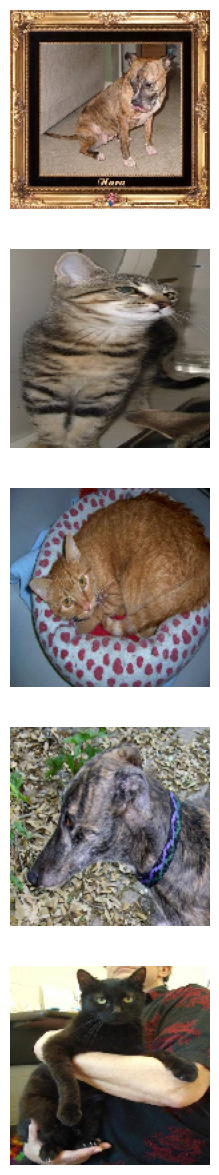

In [ ]:
# 4
def plotImages(images_arr, probabilities = False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    if probabilities is False:
      for img, ax in zip( images_arr, axes):
          ax.imshow(img)
          ax.axis('off')
    else:
      for img, probability, ax in zip( images_arr, probabilities, axes):
          ax.imshow(img)
          ax.axis('off')
          if probability > 0.5:
              ax.set_title("%.2f" % (probability*100) + "% dog")
          else:
              ax.set_title("%.2f" % ((1-probability)*100) + "% cat")
    plt.show()

sample_training_images, _ = next(train_data_gen)
plotImages(sample_training_images[:5])


In [ ]:
# 5
train_image_generator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_data_gen = train_image_generator.flow_from_directory(
    batch_size=batch_size,
    directory=train_dir,
    shuffle=True,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode='binary'
)


Found 2000 images belonging to 2 classes.


Found 2000 images belonging to 2 classes.


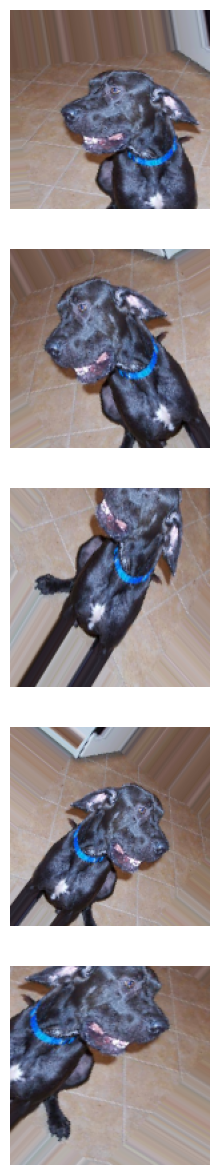

In [ ]:
# 6
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

plotImages(augmented_images)

In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

In [ ]:
# 8
history = model.fit(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)


Epoch 1/15
15/15 [==============================] - 112s 7s/step - loss: 0.7205 - accuracy: 0.4893 - val_loss: 0.6934 - val_accuracy: 0.5000
Epoch 2/15
15/15 [==============================] - 117s 8s/step - loss: 0.6929 - accuracy: 0.5037 - val_loss: 0.6930 - val_accuracy: 0.5000
Epoch 3/15
15/15 [==============================] - 115s 8s/step - loss: 0.6931 - accuracy: 0.5187 - val_loss: 0.6913 - val_accuracy: 0.5458
Epoch 4/15
15/15 [==============================] - 117s 8s/step - loss: 0.6888 - accuracy: 0.5353 - val_loss: 0.6758 - val_accuracy: 0.6295
Epoch 5/15
15/15 [==============================] - 118s 8s/step - loss: 0.6784 - accuracy: 0.5694 - val_loss: 0.6457 - val_accuracy: 0.6574
Epoch 6/15
15/15 [==============================] - 117s 8s/step - loss: 0.6646 - accuracy: 0.5839 - val_loss: 0.6351 - val_accuracy: 0.6417
Epoch 7/15
15/15 [==============================] - 119s 8s/step - loss: 0.6559 - accuracy: 0.6277 - val_loss: 0.6292 - val_accuracy: 0.6350
Epoch 8/15
15

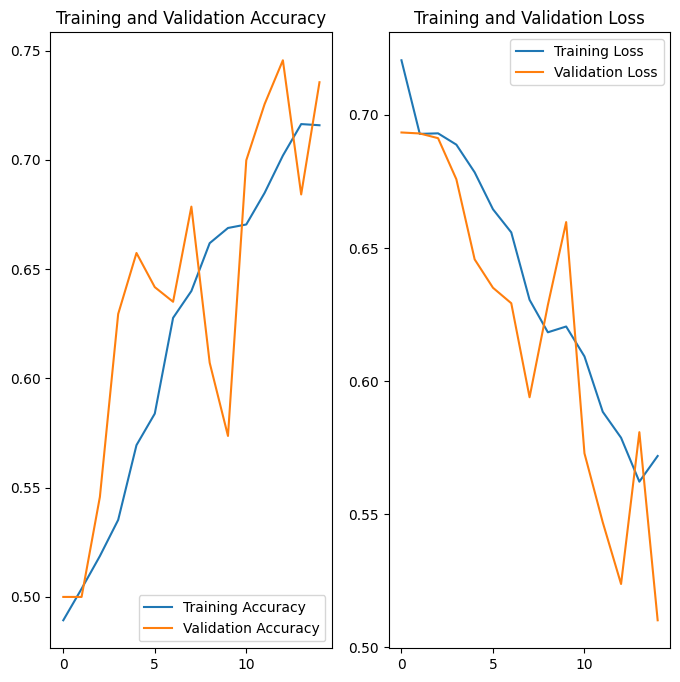

In [ ]:
# 9
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
# Vérifiez le contenu du répertoire de test
test_files = os.listdir(test_dir)
print("Files in test directory:", test_files)


Files in test directory: ['33.jpg', '24.jpg', '36.jpg', '18.jpg', '48.jpg', '35.jpg', '22.jpg', '31.jpg', '32.jpg', '11.jpg', '27.jpg', '38.jpg', '50.jpg', '19.jpg', '8.jpg', '12.jpg', '16.jpg', '5.jpg', '23.jpg', '13.jpg', '44.jpg', '9.jpg', '.DS_Store', '41.jpg', '2.jpg', '43.jpg', '39.jpg', '10.jpg', '21.jpg', '7.jpg', '37.jpg', '45.jpg', '20.jpg', '40.jpg', '34.jpg', '4.jpg', '47.jpg', '49.jpg', '42.jpg', '15.jpg', '14.jpg', '30.jpg', '29.jpg', '28.jpg', '3.jpg', '25.jpg', '1.jpg', '46.jpg', '6.jpg', '17.jpg', '26.jpg']


In [ ]:
import os

print("Test directory:", test_dir)
test_files = [f for f in os.listdir(test_dir) if f.endswith('.jpg')]
print("Filtered image files:", test_files)


Test directory: cats_and_dogs/test
Filtered image files: ['33.jpg', '24.jpg', '36.jpg', '18.jpg', '48.jpg', '35.jpg', '22.jpg', '31.jpg', '32.jpg', '11.jpg', '27.jpg', '38.jpg', '50.jpg', '19.jpg', '8.jpg', '12.jpg', '16.jpg', '5.jpg', '23.jpg', '13.jpg', '44.jpg', '9.jpg', '41.jpg', '2.jpg', '43.jpg', '39.jpg', '10.jpg', '21.jpg', '7.jpg', '37.jpg', '45.jpg', '20.jpg', '40.jpg', '34.jpg', '4.jpg', '47.jpg', '49.jpg', '42.jpg', '15.jpg', '14.jpg', '30.jpg', '29.jpg', '28.jpg', '3.jpg', '25.jpg', '1.jpg', '46.jpg', '6.jpg', '17.jpg', '26.jpg']


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

test_image_generator = ImageDataGenerator(rescale=1./255)

test_data_gen = test_image_generator.flow_from_directory(
    directory=test_dir,
    batch_size=batch_size,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode=None,  # Pas de labels, seulement des images
    shuffle=False     # Pas de mélange des images
)


Found 0 images belonging to 0 classes.


In [ ]:
print("Number of images in test data generator:", len(test_data_gen))


Number of images in test data generator: 0


In [ ]:
try:
    test_images = next(test_data_gen)
    print("Shape of test images batch:", test_images.shape)
except StopIteration:
    print("No data available in the test data generator.")


Shape of test images batch: (0, 150, 150, 3)


In [ ]:
# 11
answers =  [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
            1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
            1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
            1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
            0, 0, 0, 0, 0, 0]

correct = 0

for probability, answer in zip(probabilities, answers):
  if round(probability) == answer:
    correct +=1

percentage_identified = (correct / len(answers)) * 100

passed_challenge = percentage_identified >= 63

print(f"Your model correctly identified {round(percentage_identified, 2)}% of the images of cats and dogs.")

if passed_challenge:
  print("You passed the challenge!")
else:
  print("You haven't passed yet. Your model should identify at least 63% of the images. Keep trying. You will get it!")

NameError: name 'probabilities' is not defined